In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=3.95
b=4.05

## Importing data for Amp (Phase=0)

In [3]:
# import warnings as w
# with w.catch_warnings():
#     w.simplefilter('ignore')
#     LEPR_Amp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Amp")
#     LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']
# LEPR_Amp_Sums=pt.get_amp_sites_from_input_not_amp(LEPR_Amp_PreFilt, "_Amp")
# LEPR_Amp=LEPR_Amp_PreFilt.loc[( ( LEPR_Amp_Sums['cation_sum_All'].between(15, 16)) & (LEPR_Amp_Sums['Ca_B']>1.5))]
# LEPR_Amp_nosuf=LEPR_Amp.copy()
# LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
# LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]
# LEPR_Amp_nosuf['Phase']=0


# LEPR_Amp_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Amp, "_Amp")
# LEPR_Amp_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Amp, "_Amp")
# LEPR_Amp_nosuf['Ca_B']=LEPR_Amp_nosuf_amp_sites['Ca_B']
# LEPR_Amp_nosuf['Na_K_A']=LEPR_Amp_nosuf_amp_sites['Na_A']+LEPR_Amp_nosuf_amp_sites['K_A']
# LEPR_Amp_nosuf['Sum_Amp_Cat_Sites']=LEPR_Amp_nosuf_amp_sites['cation_sum_All']
# LEPR_Amp_nosuf['Cation_Sum_Cpx']=LEPR_Amp_nosuf_cpx_sites['Cation_Sum_Cpx']
# LEPR_Amp_nosuf['Ca_CaMgFe']=LEPR_Amp_nosuf_cpx_sites['Ca_CaMgFe']

In [4]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('GEOROC_amphioles_filtered_Ca_cationsums.xlsx', sheet_name="train")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']


In [5]:
LEPR_Amp_nosuf=LEPR_Amp_PreFilt.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]
LEPR_Amp_nosuf['Phase']=0


LEPR_Amp_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Amp_PreFilt, "_Amp")
LEPR_Amp_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Amp_PreFilt, "_Amp")
LEPR_Amp_nosuf['Ca_B']=LEPR_Amp_nosuf_amp_sites['Ca_B']
LEPR_Amp_nosuf['Na_K_A']=LEPR_Amp_nosuf_amp_sites['Na_A']+LEPR_Amp_nosuf_amp_sites['K_A']
LEPR_Amp_nosuf['Sum_Amp_Cat_Sites']=LEPR_Amp_nosuf_amp_sites['cation_sum_All']
LEPR_Amp_nosuf['Cation_Sum_Cpx']=LEPR_Amp_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Amp_nosuf['Ca_CaMgFe']=LEPR_Amp_nosuf_cpx_sites['Ca_CaMgFe']

## Importing data Cpx (phase=1)

In [6]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Cpx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cpx")
    LEPR_px_input=LEPR_Cpx_in['my_input']
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs']

LEPR_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cs.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cs.Ca_CaMgFe
LEPR_Cpx=LEPR_Cpx_PreFilt.loc[( (LEPR_Cpx_Sums.between(a, b)) & (LEPR_CaCaMgFe.between(0.2, 0.5)) )]
LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]
LEPR_Cpx_nosuf['Phase']=1

LEPR_Cpx_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Cpx, "_Cpx")
LEPR_Cpx_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Cpx, "_Cpx")
LEPR_Cpx_nosuf['Ca_B']=LEPR_Cpx_nosuf_amp_sites['Ca_B']
LEPR_Cpx_nosuf['Na_K_A']=LEPR_Cpx_nosuf_amp_sites['Na_A']+LEPR_Cpx_nosuf_amp_sites['K_A']
LEPR_Cpx_nosuf['Sum_Amp_Cat_Sites']=LEPR_Cpx_nosuf_amp_sites['cation_sum_All']
LEPR_Cpx_nosuf['Cation_Sum_Cpx']=LEPR_Cpx_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Cpx_nosuf['Ca_CaMgFe']=LEPR_Cpx_nosuf_cpx_sites['Ca_CaMgFe']

## Pigeonite data

In [7]:

LEPR_Pig=LEPR_Cpx_PreFilt.loc[( (LEPR_Cpx_Sums.between(a, b)) & (LEPR_CaCaMgFe.between(0.05, 2)) )]
LEPR_Pig_nosuf=LEPR_Pig.copy()
LEPR_Pig_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Pig_nosuf.columns]
LEPR_Pig_nosuf['Phase']=11

LEPR_Pig_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Pig, "_Cpx")
LEPR_Pig_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Pig, "_Cpx")
LEPR_Pig_nosuf['Ca_B']=LEPR_Pig_nosuf_amp_sites['Ca_B']
LEPR_Pig_nosuf['Na_K_A']=LEPR_Pig_nosuf_amp_sites['Na_A']+LEPR_Pig_nosuf_amp_sites['K_A']
LEPR_Pig_nosuf['Sum_Amp_Cat_Sites']=LEPR_Pig_nosuf_amp_sites['cation_sum_All']
LEPR_Pig_nosuf['Cation_Sum_Cpx']=LEPR_Pig_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Pig_nosuf['Ca_CaMgFe']=LEPR_Pig_nosuf_cpx_sites['Ca_CaMgFe']

## Importing data Opx (Phase=1)

In [8]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Opx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Opx")
    LEPR_px_input=LEPR_Opx_in['my_input']
    LEPR_Opx_PreFilt=LEPR_Opx_in['Opxs']

LEPR_Opx_cs=pt.calculate_orthopyroxene_components(opx_comps=LEPR_Opx_PreFilt)
LEPR_Opx_Sums=LEPR_Opx_cs.Cation_Sum_Opx
LEPR_CaCaMgFe=LEPR_Opx_cs.Ca_CaMgFe


LEPR_Opx=LEPR_Opx_PreFilt.loc[( (LEPR_Opx_Sums.between(a, b)) & (LEPR_CaCaMgFe.between(-0.01, 0.05) )) ]


LEPR_Opx_nosuf=LEPR_Opx.copy()
LEPR_Opx_nosuf.columns = [col.replace('_Opx', '') for col in LEPR_Opx_nosuf.columns]

LEPR_Opx_nosuf['Phase']=10


LEPR_Opx_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Opx, "_Opx")
LEPR_Opx_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Opx, "_Opx")
LEPR_Opx_nosuf['Ca_B']=LEPR_Opx_nosuf_amp_sites['Ca_B']
LEPR_Opx_nosuf['Na_K_A']=LEPR_Opx_nosuf_amp_sites['Na_A']+LEPR_Opx_nosuf_amp_sites['K_A']
LEPR_Opx_nosuf['Sum_Amp_Cat_Sites']=LEPR_Opx_nosuf_amp_sites['cation_sum_All']
LEPR_Opx_nosuf['Cation_Sum_Cpx']=LEPR_Opx_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Opx_nosuf['Ca_CaMgFe']=LEPR_Opx_nosuf_cpx_sites['Ca_CaMgFe']

## Importing data for Plag (Phase=2)

In [9]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Plag_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Plag")
    LEPR_px_input=LEPR_Plag_in['my_input']
    LEPR_Plag_PreFilt=LEPR_Plag_in['Plags']


LEPR_Plag=LEPR_Plag_PreFilt


LEPR_Plag_nosuf=LEPR_Plag.copy()
LEPR_Plag_nosuf.columns = [col.replace('_Plag', '') for col in LEPR_Plag_nosuf.columns]


LEPR_Plag_nosuf['Phase']=2

LEPR_Plag_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Plag, "_Plag")
LEPR_Plag_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Plag, "_Plag")
LEPR_Plag_nosuf['Ca_B']=LEPR_Plag_nosuf_amp_sites['Ca_B']
LEPR_Plag_nosuf['Na_K_A']=LEPR_Plag_nosuf_amp_sites['Na_A']+LEPR_Plag_nosuf_amp_sites['K_A']
LEPR_Plag_nosuf['Sum_Amp_Cat_Sites']=LEPR_Plag_nosuf_amp_sites['cation_sum_All']
LEPR_Plag_nosuf['Cation_Sum_Cpx']=LEPR_Plag_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Plag_nosuf['Ca_CaMgFe']=LEPR_Plag_nosuf_cpx_sites['Ca_CaMgFe']

## Importing data for olivine (Phase = 3)

In [10]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Ol_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Ol")
    LEPR_px_input=LEPR_Ol_in['my_input']
    LEPR_Ol_PreFilt=LEPR_Ol_in['Ols']


LEPR_Ol=LEPR_Ol_PreFilt


LEPR_Ol_nosuf=LEPR_Ol.copy()
LEPR_Ol_nosuf.columns = [col.replace('_Ol', '') for col in LEPR_Ol_nosuf.columns]

LEPR_Ol_nosuf['Phase']=3

LEPR_Ol_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Ol, "_Ol")
LEPR_Ol_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Ol, "_Ol")
LEPR_Ol_nosuf['Ca_B']=LEPR_Ol_nosuf_amp_sites['Ca_B']
LEPR_Ol_nosuf['Na_K_A']=LEPR_Ol_nosuf_amp_sites['Na_A']+LEPR_Ol_nosuf_amp_sites['K_A']
LEPR_Ol_nosuf['Sum_Amp_Cat_Sites']=LEPR_Ol_nosuf_amp_sites['cation_sum_All']
LEPR_Ol_nosuf['Cation_Sum_Cpx']=LEPR_Ol_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Ol_nosuf['Ca_CaMgFe']=LEPR_Ol_nosuf_cpx_sites['Ca_CaMgFe']

## Importing Spinel data (Phase = 4)

In [11]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Sp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cr_Sp")
    LEPR_Sp_input=LEPR_Sp_in['my_input']
    LEPR_Sp_PreFilt=LEPR_Sp_in['Sps']

LEPR_Sp=LEPR_Sp_PreFilt
LEPR_Sp_nosuf=LEPR_Sp.copy()
LEPR_Sp_nosuf.columns = [col.replace('_Sp', '') for col in LEPR_Sp_nosuf.columns]
LEPR_Sp_nosuf['Phase']=4

LEPR_Sp_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Sp, "_Sp")
LEPR_Sp_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Sp, "_Sp")
LEPR_Sp_nosuf['Ca_B']=LEPR_Sp_nosuf_amp_sites['Ca_B']
LEPR_Sp_nosuf['Na_K_A']=LEPR_Sp_nosuf_amp_sites['Na_A']+LEPR_Sp_nosuf_amp_sites['K_A']
LEPR_Sp_nosuf['Sum_Amp_Cat_Sites']=LEPR_Sp_nosuf_amp_sites['cation_sum_All']
LEPR_Sp_nosuf['Cation_Sum_Cpx']=LEPR_Sp_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Sp_nosuf['Ca_CaMgFe']=LEPR_Sp_nosuf_cpx_sites['Ca_CaMgFe']


## Importing Oxide, phase = 5

In [12]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Ox_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Oxide")
    LEPR_Ox_input=LEPR_Ox_in['my_input']
    LEPR_Ox_PreFilt=LEPR_Ox_in['Sps']


LEPR_Ox=LEPR_Ox_PreFilt

LEPR_Ox_nosuf=LEPR_Ox.copy()
LEPR_Ox_nosuf.columns = [col.replace('_Sp', '') for col in LEPR_Ox_nosuf.columns]

LEPR_Ox_nosuf['Phase']=5

LEPR_Ox_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Ox, "_Sp")
LEPR_Ox_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Ox, "_Sp")
LEPR_Ox_nosuf['Ca_B']=LEPR_Ox_nosuf_amp_sites['Ca_B']
LEPR_Ox_nosuf['Na_K_A']=LEPR_Ox_nosuf_amp_sites['Na_A']+LEPR_Ox_nosuf_amp_sites['K_A']
LEPR_Ox_nosuf['Sum_Amp_Cat_Sites']=LEPR_Ox_nosuf_amp_sites['cation_sum_All']
LEPR_Ox_nosuf['Cation_Sum_Cpx']=LEPR_Ox_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Ox_nosuf['Ca_CaMgFe']=LEPR_Ox_nosuf_cpx_sites['Ca_CaMgFe']

## Apatite, phase = 6

In [13]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Ap_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Apatite")
    LEPR_Ap_input=LEPR_Ap_in['my_input']
    LEPR_Ap_PreFilt=LEPR_Ap_in['my_oxides']



LEPR_Ap=LEPR_Ap_PreFilt.add_suffix("_Ap")

LEPR_Ap_nosuf=LEPR_Ap.copy()
LEPR_Ap_nosuf.columns = [col.replace('_Ap', '') for col in LEPR_Ap_nosuf.columns]

LEPR_Ap_nosuf['Phase']=6

LEPR_Ap_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Ap, "_Ap")
LEPR_Ap_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Ap, "_Ap")
LEPR_Ap_nosuf['Ca_B']=LEPR_Ap_nosuf_amp_sites['Ca_B']
LEPR_Ap_nosuf['Na_K_A']=LEPR_Ap_nosuf_amp_sites['Na_A']+LEPR_Ap_nosuf_amp_sites['K_A']
LEPR_Ap_nosuf['Sum_Amp_Cat_Sites']=LEPR_Ap_nosuf_amp_sites['cation_sum_All']
LEPR_Ap_nosuf['Cation_Sum_Cpx']=LEPR_Ap_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Ap_nosuf['Ca_CaMgFe']=LEPR_Ap_nosuf_cpx_sites['Ca_CaMgFe']

## Biotite N=7

In [14]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Bt_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Biotite")
    LEPR_Bt_input=LEPR_Bt_in['my_input']
    LEPR_Bt_PreFilt=LEPR_Bt_in['my_oxides']


LEPR_Bt=LEPR_Bt_PreFilt.add_suffix("_Bt")
LEPR_Bt_nosuf=LEPR_Bt.copy()
LEPR_Bt_nosuf.columns = [col.replace('_Bt', '') for col in LEPR_Bt_nosuf.columns]

LEPR_Bt_nosuf['Phase']=7

LEPR_Bt_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Bt, "_Bt")
LEPR_Bt_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Bt, "_Bt")
LEPR_Bt_nosuf['Ca_B']=LEPR_Bt_nosuf_amp_sites['Ca_B']
LEPR_Bt_nosuf['Na_K_A']=LEPR_Bt_nosuf_amp_sites['Na_A']+LEPR_Bt_nosuf_amp_sites['K_A']
LEPR_Bt_nosuf['Sum_Amp_Cat_Sites']=LEPR_Bt_nosuf_amp_sites['cation_sum_All']
LEPR_Bt_nosuf['Cation_Sum_Cpx']=LEPR_Bt_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Bt_nosuf['Ca_CaMgFe']=LEPR_Bt_nosuf_cpx_sites['Ca_CaMgFe']

## Quartz, N=8

In [15]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Qz_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Quartz")
    LEPR_Qz_input=LEPR_Qz_in['my_input']
    LEPR_Qz_PreFilt=LEPR_Qz_in['my_oxides']


LEPR_Qz=LEPR_Qz_PreFilt.add_suffix("_Qz")


LEPR_Qz_nosuf=LEPR_Qz.copy()
LEPR_Qz_nosuf.columns = [col.replace('_Qz', '') for col in LEPR_Qz_nosuf.columns]

LEPR_Qz_nosuf['Phase']=8

LEPR_Qz_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Qz, "_Qz")
LEPR_Qz_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Qz, "_Qz")
LEPR_Qz_nosuf['Ca_B']=LEPR_Qz_nosuf_amp_sites['Ca_B']
LEPR_Qz_nosuf['Na_K_A']=LEPR_Qz_nosuf_amp_sites['Na_A']+LEPR_Qz_nosuf_amp_sites['K_A']
LEPR_Qz_nosuf['Sum_Amp_Cat_Sites']=LEPR_Qz_nosuf_amp_sites['cation_sum_All']
LEPR_Qz_nosuf['Cation_Sum_Cpx']=LEPR_Qz_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Qz_nosuf['Ca_CaMgFe']=LEPR_Qz_nosuf_cpx_sites['Ca_CaMgFe']

## Garnet N=9

In [16]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Gt_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Garnet")
    LEPR_Gt_input=LEPR_Gt_in['my_input']
    LEPR_Gt_PreFilt=LEPR_Gt_in['my_oxides']


LEPR_Gt=LEPR_Gt_PreFilt.add_suffix("_Gt")

LEPR_Gt_nosuf=LEPR_Gt.copy()
LEPR_Gt_nosuf.columns = [col.replace('_Gt', '') for col in LEPR_Gt_nosuf.columns]


LEPR_Gt_nosuf['Phase']=9

LEPR_Gt_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Gt, "_Gt")
LEPR_Gt_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Gt, "_Gt")
LEPR_Gt_nosuf['Ca_B']=LEPR_Gt_nosuf_amp_sites['Ca_B']
LEPR_Gt_nosuf['Na_K_A']=LEPR_Gt_nosuf_amp_sites['Na_A']+LEPR_Gt_nosuf_amp_sites['K_A']
LEPR_Gt_nosuf['Sum_Amp_Cat_Sites']=LEPR_Gt_nosuf_amp_sites['cation_sum_All']
LEPR_Gt_nosuf['Cation_Sum_Cpx']=LEPR_Gt_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Gt_nosuf['Ca_CaMgFe']=LEPR_Gt_nosuf_cpx_sites['Ca_CaMgFe']


## Alk Feldspar Phase = 2

In [17]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')    
    LEPR_Kspar_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Kspar")
    LEPR_px_input=LEPR_Kspar_in['my_input']
    LEPR_Kspar_PreFilt=LEPR_Kspar_in['Kspars']


LEPR_Kspar=LEPR_Kspar_PreFilt


LEPR_Kspar_nosuf=LEPR_Kspar.copy()
LEPR_Kspar_nosuf.columns = [col.replace('_Kspar', '') for col in LEPR_Kspar_nosuf.columns]


LEPR_Kspar_nosuf['Phase']=2
LEPR_Kspar_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(LEPR_Kspar, "_Kspar")
LEPR_Kspar_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(LEPR_Kspar, "_Kspar")
LEPR_Kspar_nosuf['Ca_B']=LEPR_Kspar_nosuf_amp_sites['Ca_B']
LEPR_Kspar_nosuf['Na_K_A']=LEPR_Kspar_nosuf_amp_sites['Na_A']+LEPR_Kspar_nosuf_amp_sites['K_A']
LEPR_Kspar_nosuf['Sum_Amp_Cat_Sites']=LEPR_Kspar_nosuf_amp_sites['cation_sum_All']
LEPR_Kspar_nosuf['Cation_Sum_Cpx']=LEPR_Kspar_nosuf_cpx_sites['Cation_Sum_Cpx']
LEPR_Kspar_nosuf['Ca_CaMgFe']=LEPR_Kspar_nosuf_cpx_sites['Ca_CaMgFe']

## Stitching different phases together

In [18]:
LEPR_Combo=pd.concat([LEPR_Cpx_nosuf, LEPR_Pig_nosuf, LEPR_Amp_nosuf, LEPR_Opx_nosuf,  LEPR_Plag_nosuf, 
                      LEPR_Ol_nosuf,  LEPR_Sp_nosuf, LEPR_Ox_nosuf, LEPR_Kspar_nosuf, LEPR_Ap_nosuf,
                     LEPR_Bt_nosuf, LEPR_Qz_nosuf, LEPR_Gt_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
LEPR_Combo.replace([np.nan, -np.nan], 0, inplace=True)
LEPR_Y=LEPR_Combo['Phase']
LEPR_Combo_noclass=LEPR_Combo.drop(columns=['Phase', 'Sample_ID', 'NiO', 'Cr2O3',  'P2O5'])
LEPR_X=LEPR_Combo_noclass.values


In [19]:
LEPR_Combo_noclass

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe
0,52.500000,0.33,1.580000,9.89,0.24,13.290000,22.50,0.37,0.00,3.441781,0.102418,15.384760,4.013416,0.461914
1,51.400000,0.80,1.750000,10.90,0.29,13.900000,19.80,0.33,0.00,3.074089,0.092713,15.361128,4.007251,0.415553
2,48.800000,1.16,5.220000,16.30,0.25,13.200000,13.90,0.63,0.00,2.172865,0.178210,15.390959,4.015033,0.308970
3,47.300000,1.78,8.860000,14.10,0.22,12.900000,13.10,1.14,0.00,2.026207,0.319074,15.382732,4.012887,0.311507
4,48.800000,1.40,7.590000,16.40,0.22,12.700000,12.30,0.85,0.00,1.894641,0.236927,15.307265,3.993200,0.287581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10851,41.580002,0.46,20.299999,7.22,0.00,20.370001,6.84,0.00,0.00,1.031123,0.000000,15.418106,4.022115,0.167577
10852,41.169998,0.53,21.740000,7.32,0.00,20.070000,7.64,0.00,0.00,1.135575,0.000000,15.456264,4.032069,0.185088
10853,41.680000,0.28,20.740000,6.63,0.00,20.600000,6.89,0.00,0.00,1.034799,0.000000,15.414914,4.021282,0.169177
10854,42.080002,0.73,19.480000,6.65,0.00,20.959999,7.03,0.00,0.00,1.056128,0.000000,15.413298,4.020860,0.169876


In [20]:
np.shape(LEPR_X)

(10856, 14)

## Just unusual phases

## Importing new data from my compilation

In [21]:
PW_Amp_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Amp")
PW_Amp_input=PW_Amp_in['my_input']
PW_Amp_PreFilt=PW_Amp_in['Amps']
PW_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=PW_Amp_PreFilt).cation_sum_All
PW_Amp=PW_Amp_PreFilt.loc[PW_Amp_Sums.between(15, 16)]
PW_Amp_nosuf=PW_Amp.copy()
PW_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
PW_Amp_nosuf.columns = [col.replace('_Amp', '') for col in PW_Amp_nosuf.columns]
PW_Amp_nosuf['Phase']=0

PW_Amp_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(PW_Amp, "_Amp")
PW_Amp_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(PW_Amp, "_Amp")
PW_Amp_nosuf['Ca_B']=PW_Amp_nosuf_amp_sites['Ca_B']
PW_Amp_nosuf['Na_K_A']=PW_Amp_nosuf_amp_sites['Na_A']+PW_Amp_nosuf_amp_sites['K_A']
PW_Amp_nosuf['Sum_Amp_Cat_Sites']=PW_Amp_nosuf_amp_sites['cation_sum_All']
PW_Amp_nosuf['Cation_Sum_Cpx']=PW_Amp_nosuf_cpx_sites['Cation_Sum_Cpx']
PW_Amp_nosuf['Ca_CaMgFe']=PW_Amp_nosuf_cpx_sites['Ca_CaMgFe']

In [22]:
PW_Cpx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Cpx")
PW_Cpx_input=PW_Cpx_in['my_input']
PW_Cpx_PreFilt=PW_Cpx_in['Cpxs']
PW_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=PW_Cpx_PreFilt)
PW_Cpx_Sums=PW_Cpx_cs.Cation_Sum_Cpx
PW_CaCaMgFe=PW_Cpx_cs.Ca_CaMgFe

#PW_Cpx_PreFilt['Sample_ID']=PW_Cpx_input['Experiment']
PW_Cpx=PW_Cpx_PreFilt.loc[(PW_Cpx_Sums.between(a, b)) & (PW_CaCaMgFe>0.2) ]


PW_Cpx_nosuf=PW_Cpx.copy()
PW_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in PW_Cpx_nosuf.columns]

PW_Cpx_nosuf['Phase']=1
PW_Cpx_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(PW_Cpx, "_Cpx")
PW_Cpx_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(PW_Cpx, "_Cpx")
PW_Cpx_nosuf['Ca_B']=PW_Cpx_nosuf_amp_sites['Ca_B']
PW_Cpx_nosuf['Na_K_A']=PW_Cpx_nosuf_amp_sites['Na_A']+PW_Cpx_nosuf_amp_sites['K_A']
PW_Cpx_nosuf['Sum_Amp_Cat_Sites']=PW_Cpx_nosuf_amp_sites['cation_sum_All']
PW_Cpx_nosuf['Cation_Sum_Cpx']=PW_Cpx_nosuf_cpx_sites['Cation_Sum_Cpx']
PW_Cpx_nosuf['Ca_CaMgFe']=PW_Cpx_nosuf_cpx_sites['Ca_CaMgFe']

In [23]:
PW_Opx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Opx")
PW_Opx_input=PW_Opx_in['my_input']
PW_Opx_PreFilt=PW_Opx_in['Opxs']
PW_Opx_cs=pt.calculate_orthopyroxene_components(opx_comps=PW_Opx_PreFilt)
PW_Opx_Sums=PW_Opx_cs.Cation_Sum_Opx
PW_CaCaMgFe=PW_Opx_cs.Ca_CaMgFe


PW_Opx=PW_Opx_PreFilt.loc[(PW_Opx_Sums.between(a, b)) & (PW_CaCaMgFe<0.05) ]


PW_Opx_nosuf=PW_Opx.copy()
PW_Opx_nosuf.columns = [col.replace('_Opx', '') for col in PW_Opx_nosuf.columns]

PW_Opx_nosuf['Phase']=1

PW_Opx_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(PW_Opx, "_Opx")
PW_Opx_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(PW_Opx, "_Opx")
PW_Opx_nosuf['Ca_B']=PW_Opx_nosuf_amp_sites['Ca_B']
PW_Opx_nosuf['Na_K_A']=PW_Opx_nosuf_amp_sites['Na_A']+PW_Opx_nosuf_amp_sites['K_A']
PW_Opx_nosuf['Sum_Amp_Cat_Sites']=PW_Opx_nosuf_amp_sites['cation_sum_All']
PW_Opx_nosuf['Cation_Sum_Cpx']=PW_Opx_nosuf_cpx_sites['Cation_Sum_Cpx']
PW_Opx_nosuf['Ca_CaMgFe']=PW_Opx_nosuf_cpx_sites['Ca_CaMgFe']

In [24]:
PW_Plag_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", 
                           sheet_name="Plag-Liq")
PW_Plag_input=PW_Plag_in['my_input']
PW_Plag_PreFilt=PW_Plag_in['Plags']


PW_Plag=PW_Plag_PreFilt


PW_Plag_nosuf=PW_Plag.copy()
PW_Plag_nosuf.columns = [col.replace('_Plag', '') for col in PW_Plag_nosuf.columns]

PW_Plag_nosuf['Phase']=2
PW_Plag_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(PW_Plag, "_Plag")
PW_Plag_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(PW_Plag, "_Plag")
PW_Plag_nosuf['Ca_B']=PW_Plag_nosuf_amp_sites['Ca_B']
PW_Plag_nosuf['Na_K_A']=PW_Plag_nosuf_amp_sites['Na_A']+PW_Plag_nosuf_amp_sites['K_A']
PW_Plag_nosuf['Sum_Amp_Cat_Sites']=PW_Plag_nosuf_amp_sites['cation_sum_All']
PW_Plag_nosuf['Cation_Sum_Cpx']=PW_Plag_nosuf_cpx_sites['Cation_Sum_Cpx']
PW_Plag_nosuf['Ca_CaMgFe']=PW_Plag_nosuf_cpx_sites['Ca_CaMgFe']

In [25]:
PW_Ol_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Ol-Liq")
PW_Ol_input=PW_Ol_in['my_input']
PW_Ol_PreFilt=PW_Ol_in['Ols']


PW_Ol=PW_Ol_PreFilt


PW_Ol_nosuf=PW_Ol.copy()
PW_Ol_nosuf.columns = [col.replace('_Ol', '') for col in PW_Ol_nosuf.columns]

PW_Ol_nosuf['Phase']=3
PW_Ol_nosuf_amp_sites=pt.get_amp_sites_from_input_not_amp(PW_Ol, "_Ol")
PW_Ol_nosuf_cpx_sites=pt.calculate_cpx_sites_from_input_not_cpx(PW_Ol, "_Ol")
PW_Ol_nosuf['Ca_B']=PW_Ol_nosuf_amp_sites['Ca_B']
PW_Ol_nosuf['Na_K_A']=PW_Ol_nosuf_amp_sites['Na_A']+PW_Ol_nosuf_amp_sites['K_A']
PW_Ol_nosuf['Sum_Amp_Cat_Sites']=PW_Ol_nosuf_amp_sites['cation_sum_All']
PW_Ol_nosuf['Cation_Sum_Cpx']=PW_Ol_nosuf_cpx_sites['Cation_Sum_Cpx']
PW_Ol_nosuf['Ca_CaMgFe']=PW_Ol_nosuf_cpx_sites['Ca_CaMgFe']

In [26]:
PW_Cpx_nosuf

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,Sample_ID,Phase,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe
0,46.900002,1.07,9.14,10.700000,0.30,10.00,20.299999,0.59,0.02,0.00,0,1,3.165947,0.170221,15.357328,4.006260,0.476918
1,48.099998,0.85,8.32,12.300000,0.29,10.50,18.500000,0.71,0.01,0.00,1,1,2.869322,0.201116,15.335563,4.000582,0.433159
2,48.299999,0.71,7.80,11.200000,0.40,12.20,19.200001,0.60,0.04,0.00,2,1,2.947465,0.173987,15.431672,4.025654,0.427462
3,48.799999,0.64,6.53,16.200001,0.50,10.10,16.400000,0.64,0.07,0.00,3,1,2.568133,0.194406,15.332303,3.999731,0.380537
4,50.900002,0.38,4.37,4.560000,0.00,15.40,23.100000,0.20,0.00,0.71,4,1,3.499821,0.054832,15.385723,4.013667,0.480390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,51.150000,0.71,3.40,8.950000,0.44,12.52,21.960000,0.62,0.06,0.00,844,1,3.380850,0.183725,15.377596,4.011547,0.473630
845,53.080000,0.49,2.50,11.870000,0.68,12.27,18.290000,0.73,0.08,0.00,845,1,2.808857,0.217496,15.236705,3.974793,0.409845
846,51.920000,0.58,2.32,11.420000,0.68,13.35,18.630000,0.67,0.09,0.00,846,1,2.878230,0.203866,15.355475,4.005776,0.403964
847,51.390000,0.41,1.67,12.590000,0.76,13.35,17.910000,0.57,0.02,0.00,847,1,2.808042,0.165451,15.373668,4.010522,0.386731


In [27]:
PW_Combo=pd.concat([PW_Cpx_nosuf, PW_Amp_nosuf, PW_Opx_nosuf, PW_Plag_nosuf, PW_Ol_nosuf]  , axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
PW_Y=PW_Combo['Phase']
Sample_ID_PW=PW_Combo['Sample_ID']
PW_Combo_noclass=PW_Combo.drop(columns=['Phase', 'Sample_ID', 'NiO', 'Cr2O3'])
PW_X=PW_Combo_noclass.values

In [28]:
PW_Combo_noclass

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe
0,46.900002,1.07,9.14,10.700000,0.30,10.0,20.299999,0.59,0.02,3.165947,0.170221,15.357328,4.006260,0.476918
1,48.099998,0.85,8.32,12.300000,0.29,10.5,18.500000,0.71,0.01,2.869322,0.201116,15.335563,4.000582,0.433159
2,48.299999,0.71,7.80,11.200000,0.40,12.2,19.200001,0.60,0.04,2.947465,0.173987,15.431672,4.025654,0.427462
3,48.799999,0.64,6.53,16.200001,0.50,10.1,16.400000,0.64,0.07,2.568133,0.194406,15.332303,3.999731,0.380537
4,50.900002,0.38,4.37,4.560000,0.00,15.4,23.100000,0.20,0.00,3.499821,0.054832,15.385723,4.013667,0.480390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,33.400000,0.00,0.00,48.800000,1.08,16.3,0.200000,0.00,0.00,0.037044,0.000000,17.225600,4.493635,0.003280
2787,33.300000,0.00,0.00,51.000000,1.28,13.6,0.600000,0.00,0.00,0.112633,0.000000,17.164334,4.477652,0.010113
2788,34.200000,0.00,0.00,45.000000,0.96,19.5,0.300000,0.00,0.00,0.054261,0.000000,17.226090,4.493763,0.004796
2789,34.900000,0.00,0.00,39.900000,0.78,23.2,0.500000,0.00,0.00,0.088662,0.000000,17.222779,4.492899,0.007822


In [29]:
PW_Combo_noclass

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe
0,46.900002,1.07,9.14,10.700000,0.30,10.0,20.299999,0.59,0.02,3.165947,0.170221,15.357328,4.006260,0.476918
1,48.099998,0.85,8.32,12.300000,0.29,10.5,18.500000,0.71,0.01,2.869322,0.201116,15.335563,4.000582,0.433159
2,48.299999,0.71,7.80,11.200000,0.40,12.2,19.200001,0.60,0.04,2.947465,0.173987,15.431672,4.025654,0.427462
3,48.799999,0.64,6.53,16.200001,0.50,10.1,16.400000,0.64,0.07,2.568133,0.194406,15.332303,3.999731,0.380537
4,50.900002,0.38,4.37,4.560000,0.00,15.4,23.100000,0.20,0.00,3.499821,0.054832,15.385723,4.013667,0.480390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,33.400000,0.00,0.00,48.800000,1.08,16.3,0.200000,0.00,0.00,0.037044,0.000000,17.225600,4.493635,0.003280
2787,33.300000,0.00,0.00,51.000000,1.28,13.6,0.600000,0.00,0.00,0.112633,0.000000,17.164334,4.477652,0.010113
2788,34.200000,0.00,0.00,45.000000,0.96,19.5,0.300000,0.00,0.00,0.054261,0.000000,17.226090,4.493763,0.004796
2789,34.900000,0.00,0.00,39.900000,0.78,23.2,0.500000,0.00,0.00,0.088662,0.000000,17.222779,4.492899,0.007822


## Tutorial from https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

 - Good explanation of how it works here
    https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

In [30]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [31]:
# In my example, 0 is amphibole, 1 is cpx, 2 is Opx, 3 is Plag, 4 is Ol

In [32]:
X_test_noscaled=PW_X
y_test=PW_Y

X_train_noscaled=LEPR_X
y_train=LEPR_Y

In [33]:
np.shape(X_train_noscaled)

(10856, 14)

In [34]:
from sklearn.preprocessing import StandardScaler
X_test_noscaled=PW_X
y_test=PW_Y

X_train_noscaled=LEPR_X
y_train=LEPR_Y

scaler = StandardScaler().fit(X_train_noscaled)
X_train_scaled = scaler.transform(X_train_noscaled)
X_test_scaled=scaler.transform(X_test_noscaled)
# from sklearn.tree import DecisionTreeClassifier
# dtree_model = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)
# svc_predictions = dtree_model.predict(X_test)

# cm = confusion_matrix(y_test, svc_predictions)

from sklearn.svm import SVC
svc_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_scaled, y_train)
svc_predictions = svc_model_linear.predict(X_test_scaled)
  
# model accuracy for X_test  
accuracy = svc_model_linear.score(X_test_scaled, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svc_predictions)

In [35]:
accuracy

0.562164098889287

In [36]:
len(PW_Cpx)

815

In [37]:
# 'amp', cpx+opx+pig, plag+alk, ol, sp, ox, alk
cm

array([[311,   0,   0,   0,   0,   0,   1],
       [ 39,   0,   0,   0,   0, 405, 776],
       [  0,   0, 818,   0,   1,   0,   0],
       [  0,   0,   0, 440,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

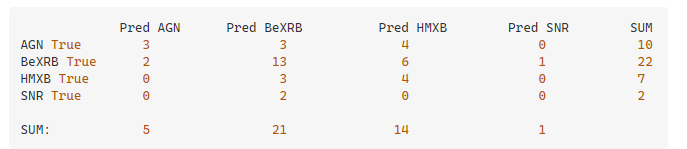

In [38]:
pred_amp_svc=svc_predictions==0
pred_px_svc=svc_predictions==1
pred_opx_svc=svc_predictions==10
pred_pig_svc=svc_predictions==11
pred_fspar_svc=svc_predictions==2
pred_ol_svc=svc_predictions==3
pred_sp_svc=svc_predictions==4
pred_ox_svc=svc_predictions==5

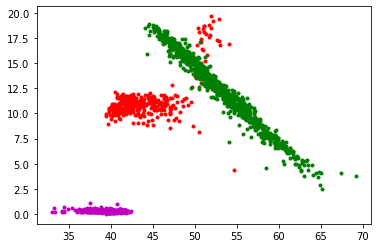

In [39]:


plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc], PW_Combo['CaO'].loc[pred_amp_svc], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc], PW_Combo['CaO'].loc[pred_px_svc], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc], PW_Combo['CaO'].loc[pred_fspar_svc], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc], PW_Combo['CaO'].loc[pred_ol_svc], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc], PW_Combo['CaO'].loc[pred_sp_svc], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc], PW_Combo['CaO'].loc[pred_ox_svc],  '*g', alpha=0.7, ms=3)



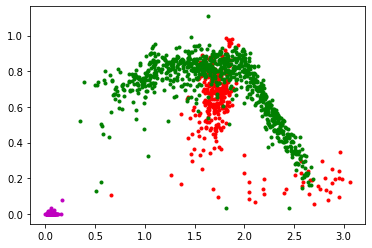

In [40]:
pred_amp_svc=svc_predictions==0
pred_px_svc=svc_predictions==1
pred_fspar_svc=svc_predictions==2
pred_ol_svc=svc_predictions==3
pred_sp_svc=svc_predictions==4
pred_ox_svc=svc_predictions==5

plt.plot(PW_Combo['Ca_B'].loc[pred_amp_svc], PW_Combo['Na_K_A'].loc[pred_amp_svc], '.r')
plt.plot(PW_Combo['Ca_B'].loc[pred_px_svc], PW_Combo['Na_K_A'].loc[pred_px_svc], '.c')
plt.plot(PW_Combo['Ca_B'].loc[pred_fspar_svc], PW_Combo['Na_K_A'].loc[pred_fspar_svc], '.g')
plt.plot(PW_Combo['Ca_B'].loc[pred_ol_svc], PW_Combo['Na_K_A'].loc[pred_ol_svc], '.m')
plt.plot(PW_Combo['Ca_B'].loc[pred_sp_svc], PW_Combo['Na_K_A'].loc[pred_sp_svc], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['Ca_B'].loc[pred_ox_svc], PW_Combo['Na_K_A'].loc[pred_ox_svc],  '*g', alpha=0.7, ms=3)



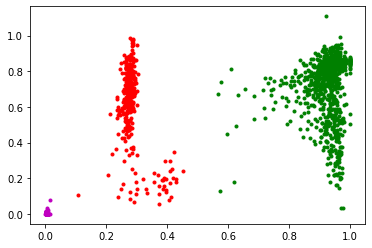

In [41]:
pred_amp_svc=svc_predictions==0
pred_px_svc=svc_predictions==1
pred_fspar_svc=svc_predictions==2
pred_ol_svc=svc_predictions==3
pred_sp_svc=svc_predictions==4
pred_ox_svc=svc_predictions==5

plt.plot(PW_Combo['Ca_CaMgFe'].loc[pred_amp_svc], PW_Combo['Na_K_A'].loc[pred_amp_svc], '.r')
plt.plot(PW_Combo['Ca_CaMgFe'].loc[pred_px_svc], PW_Combo['Na_K_A'].loc[pred_px_svc], '.c')
plt.plot(PW_Combo['Ca_CaMgFe'].loc[pred_fspar_svc], PW_Combo['Na_K_A'].loc[pred_fspar_svc], '.g')
plt.plot(PW_Combo['Ca_CaMgFe'].loc[pred_ol_svc], PW_Combo['Na_K_A'].loc[pred_ol_svc], '.m')
plt.plot(PW_Combo['Ca_CaMgFe'].loc[pred_sp_svc], PW_Combo['Na_K_A'].loc[pred_sp_svc], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['Ca_CaMgFe'].loc[pred_ox_svc], PW_Combo['Na_K_A'].loc[pred_ox_svc],  '*g', alpha=0.7, ms=3)



## True Cpxs -Perfect classification!?

In [42]:
## Currently none classified as Pigeonites
Actual_Cpx=PW_Combo['Phase']==1
print('Number predicted amp')
print(sum(pred_amp_svc&Actual_Cpx))
print('Number actual Cpx')
len(Actual_Cpx)


Number predicted amp
39
Number actual Cpx


2791

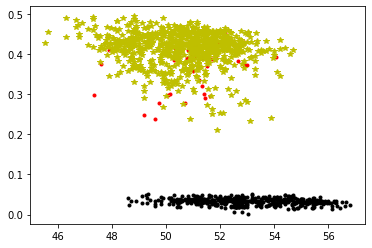

In [43]:


plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_amp_svc&Actual_Cpx], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_opx_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_opx_svc&Actual_Cpx], '.k')
plt.plot(PW_Combo['SiO2'].loc[pred_pig_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_pig_svc&Actual_Cpx], '*y')


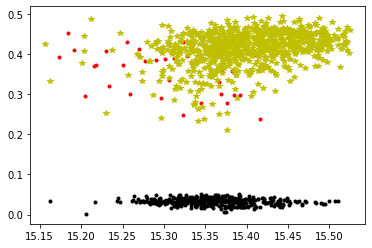

In [44]:


plt.plot(PW_Combo['Sum_Amp_Cat_Sites'].loc[pred_amp_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_amp_svc&Actual_Cpx], '.r')
plt.plot(PW_Combo['Sum_Amp_Cat_Sites'].loc[pred_px_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo['Sum_Amp_Cat_Sites'].loc[pred_opx_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_opx_svc&Actual_Cpx], '.k')
plt.plot(PW_Combo['Sum_Amp_Cat_Sites'].loc[pred_pig_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_pig_svc&Actual_Cpx], '*y')


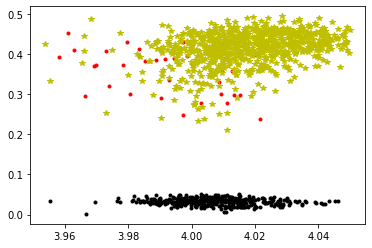

In [45]:


plt.plot(PW_Combo['Cation_Sum_Cpx'].loc[pred_amp_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_amp_svc&Actual_Cpx], '.r')
plt.plot(PW_Combo['Cation_Sum_Cpx'].loc[pred_px_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo['Cation_Sum_Cpx'].loc[pred_opx_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_opx_svc&Actual_Cpx], '.k')
plt.plot(PW_Combo['Cation_Sum_Cpx'].loc[pred_pig_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_pig_svc&Actual_Cpx], '*y')


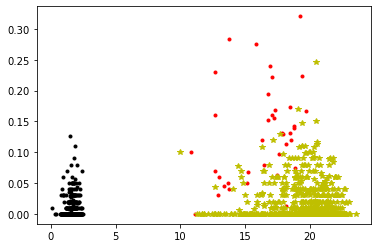

In [46]:

xplot="CaO"
yplot="K2O"
plt.plot(PW_Combo[xplot].loc[pred_amp_svc&Actual_Cpx], PW_Combo[yplot].loc[pred_amp_svc&Actual_Cpx], '.r')
plt.plot(PW_Combo[xplot].loc[pred_px_svc&Actual_Cpx], PW_Combo[yplot].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo[xplot].loc[pred_opx_svc&Actual_Cpx], PW_Combo[yplot].loc[pred_opx_svc&Actual_Cpx], '.k')
plt.plot(PW_Combo[xplot].loc[pred_pig_svc&Actual_Cpx], PW_Combo[yplot].loc[pred_pig_svc&Actual_Cpx], '*y')


In [47]:
PW_Combo

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,Sample_ID,Phase,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe,NiO
0,46.900002,1.07,9.14,10.700000,0.30,10.0,20.299999,0.59,0.02,0.00,0.0,1,3.165947,0.170221,15.357328,4.006260,0.476918,NaN
1,48.099998,0.85,8.32,12.300000,0.29,10.5,18.500000,0.71,0.01,0.00,1.0,1,2.869322,0.201116,15.335563,4.000582,0.433159,NaN
2,48.299999,0.71,7.80,11.200000,0.40,12.2,19.200001,0.60,0.04,0.00,2.0,1,2.947465,0.173987,15.431672,4.025654,0.427462,NaN
3,48.799999,0.64,6.53,16.200001,0.50,10.1,16.400000,0.64,0.07,0.00,3.0,1,2.568133,0.194406,15.332303,3.999731,0.380537,NaN
4,50.900002,0.38,4.37,4.560000,0.00,15.4,23.100000,0.20,0.00,0.71,4.0,1,3.499821,0.054832,15.385723,4.013667,0.480390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,33.400000,0.00,0.00,48.800000,1.08,16.3,0.200000,0.00,0.00,0.01,NaN,3,0.037044,0.000000,17.225600,4.493635,0.003280,0.0
2787,33.300000,0.00,0.00,51.000000,1.28,13.6,0.600000,0.00,0.00,0.02,NaN,3,0.112633,0.000000,17.164334,4.477652,0.010113,0.0
2788,34.200000,0.00,0.00,45.000000,0.96,19.5,0.300000,0.00,0.00,0.01,NaN,3,0.054261,0.000000,17.226090,4.493763,0.004796,0.0
2789,34.900000,0.00,0.00,39.900000,0.78,23.2,0.500000,0.00,0.00,0.02,NaN,3,0.088662,0.000000,17.222779,4.492899,0.007822,0.0


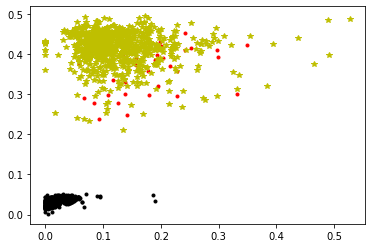

In [48]:


plt.plot(PW_Combo['Na_K_A'].loc[pred_amp_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_amp_svc&Actual_Cpx], '.r')
plt.plot(PW_Combo['Na_K_A'].loc[pred_px_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo['Na_K_A'].loc[pred_opx_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_opx_svc&Actual_Cpx], '.k')
plt.plot(PW_Combo['Na_K_A'].loc[pred_pig_svc&Actual_Cpx], PW_Combo['Ca_CaMgFe'].loc[pred_pig_svc&Actual_Cpx], '*y')


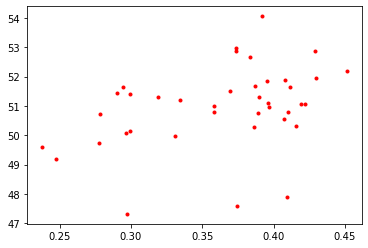

In [49]:
xaxis='Ca_CaMgFe'
plt.plot(PW_Combo[xaxis].loc[pred_px_svc&Actual_Cpx], PW_Combo['SiO2'].loc[pred_px_svc&Actual_Cpx], '.c')
plt.plot(PW_Combo[xaxis].loc[pred_amp_svc&Actual_Cpx], PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Cpx], '.r')


In [50]:
PW_Combo.loc[pred_amp_svc&Actual_Cpx]

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,Sample_ID,Phase,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe,NiO
45,49.599998,0.700000,3.630000,18.299999,0.650000,15.300000,11.100000,0.330000,0.000000,0.0,45.0,1,1.736259,0.093407,15.416524,4.021702,0.237835,NaN
140,49.189999,0.830000,6.160000,18.260000,0.960000,13.390000,10.830000,0.440000,0.100000,0.0,140.0,1,1.682162,0.142164,15.323472,3.997427,0.247756,NaN
198,50.799999,0.690000,6.370000,12.100000,0.370000,10.900000,17.100000,0.760000,0.160000,0.0,200.0,1,2.638023,0.241552,15.191268,3.962939,0.409974,NaN
544,47.320000,1.170000,6.070000,19.600000,0.510000,10.880000,12.870000,0.600000,0.030000,0.0,566.0,1,2.051969,0.178803,15.384693,4.013398,0.297187,NaN
583,47.591000,0.804000,3.898000,8.050000,0.133000,15.340000,16.543000,0.197000,0.000000,0.0,610.0,1,2.701420,0.058213,15.333652,4.000083,0.374535,NaN
607,50.542500,0.682750,3.895250,9.556000,0.237500,13.588500,18.111250,0.272250,0.012750,0.0,634.0,1,2.840547,0.079648,15.230258,3.973111,0.407212,NaN
609,52.879275,0.374925,1.908950,12.291200,0.616075,13.864225,17.217000,0.290350,0.156125,0.0,636.0,1,2.651874,0.109559,15.250877,3.978490,0.373467,NaN
611,51.454550,0.466050,1.415250,16.413300,0.852600,14.315800,13.397800,0.206150,0.045900,0.0,638.0,1,2.109882,0.067353,15.296901,3.990496,0.290455,NaN
616,52.991700,0.418717,2.566200,11.621700,0.743650,13.675200,16.766800,0.464983,0.152717,0.0,643.0,1,2.576030,0.157211,15.217967,3.969904,0.373719,NaN
617,51.657700,0.607500,1.857000,11.200300,0.623400,13.055200,18.845500,0.279000,0.074900,0.0,644.0,1,2.950941,0.093020,15.270360,3.983572,0.411907,NaN


In [51]:
PW_Combo['Sample_ID'].loc[pred_amp_svc&Actual_Cpx]

45      45.0
140    140.0
198    200.0
544    566.0
583    610.0
607    634.0
609    636.0
611    638.0
616    643.0
617    644.0
620    648.0
622    650.0
623    651.0
626    654.0
627    655.0
629    657.0
630    658.0
631    659.0
632    660.0
633    661.0
634    662.0
636    664.0
637    665.0
639    667.0
641    669.0
642    670.0
643    671.0
768    802.0
769    803.0
775    809.0
778    812.0
779    813.0
793    827.0
795    829.0
796    830.0
798    832.0
799    833.0
802    836.0
803    837.0
Name: Sample_ID, dtype: float64

In [52]:
PW_Combo.loc[pred_amp_svc&Actual_Cpx]

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,Sample_ID,Phase,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe,NiO
45,49.599998,0.700000,3.630000,18.299999,0.650000,15.300000,11.100000,0.330000,0.000000,0.0,45.0,1,1.736259,0.093407,15.416524,4.021702,0.237835,NaN
140,49.189999,0.830000,6.160000,18.260000,0.960000,13.390000,10.830000,0.440000,0.100000,0.0,140.0,1,1.682162,0.142164,15.323472,3.997427,0.247756,NaN
198,50.799999,0.690000,6.370000,12.100000,0.370000,10.900000,17.100000,0.760000,0.160000,0.0,200.0,1,2.638023,0.241552,15.191268,3.962939,0.409974,NaN
544,47.320000,1.170000,6.070000,19.600000,0.510000,10.880000,12.870000,0.600000,0.030000,0.0,566.0,1,2.051969,0.178803,15.384693,4.013398,0.297187,NaN
583,47.591000,0.804000,3.898000,8.050000,0.133000,15.340000,16.543000,0.197000,0.000000,0.0,610.0,1,2.701420,0.058213,15.333652,4.000083,0.374535,NaN
607,50.542500,0.682750,3.895250,9.556000,0.237500,13.588500,18.111250,0.272250,0.012750,0.0,634.0,1,2.840547,0.079648,15.230258,3.973111,0.407212,NaN
609,52.879275,0.374925,1.908950,12.291200,0.616075,13.864225,17.217000,0.290350,0.156125,0.0,636.0,1,2.651874,0.109559,15.250877,3.978490,0.373467,NaN
611,51.454550,0.466050,1.415250,16.413300,0.852600,14.315800,13.397800,0.206150,0.045900,0.0,638.0,1,2.109882,0.067353,15.296901,3.990496,0.290455,NaN
616,52.991700,0.418717,2.566200,11.621700,0.743650,13.675200,16.766800,0.464983,0.152717,0.0,643.0,1,2.576030,0.157211,15.217967,3.969904,0.373719,NaN
617,51.657700,0.607500,1.857000,11.200300,0.623400,13.055200,18.845500,0.279000,0.074900,0.0,644.0,1,2.950941,0.093020,15.270360,3.983572,0.411907,NaN


## True Plags
- Things one is cpx, and 2 are opx. This is very feasible. 

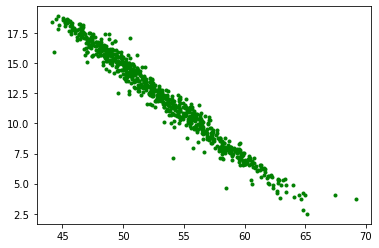

In [53]:
Actual_Plag=PW_Combo['Phase']==2
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Plag], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_px_svc&Actual_Plag], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Plag], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Plag], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Plag], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Plag], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Plag],  '*g', alpha=0.7, ms=3)


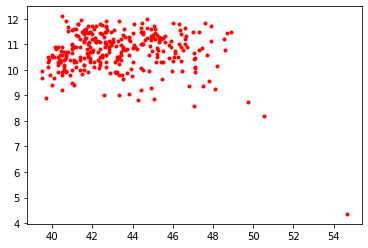

In [54]:
Actual_Amp=PW_Combo['Phase']==0
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Amp], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_px_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_px_svc&Actual_Amp], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_fspar_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_fspar_svc&Actual_Amp], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Amp], '.m')
plt.plot(PW_Combo['SiO2'].loc[pred_sp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_sp_svc&Actual_Amp], '*k', alpha=0.7, ms=3)
plt.plot(PW_Combo['SiO2'].loc[pred_ox_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ox_svc&Actual_Amp],  '*g', alpha=0.7, ms=3)


In [55]:
## CHeck dataset is wrong - Shift it off. 
PW_Combo.loc[pred_pig_svc&Actual_Plag]

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,Sample_ID,Phase,Ca_B,Na_K_A,Sum_Amp_Cat_Sites,Cation_Sum_Cpx,Ca_CaMgFe,NiO


##### These are from Peterman et al. And clearly not the phase they say they are...

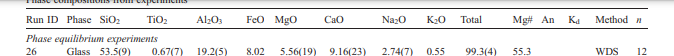

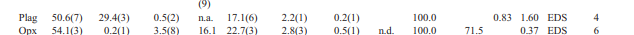

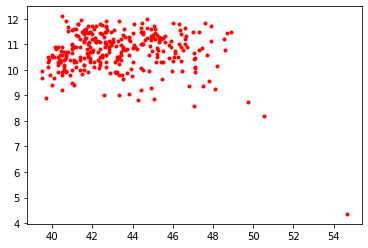

In [57]:
pred_amp_svc=svc_predictions==0
pred_cpx_svc=svc_predictions==1
pred_opx_svc=svc_predictions==2
pred_plag_svc=svc_predictions==3
pred_ol_svc=svc_predictions==4

Actual_Amp=PW_Combo['Phase']==0
plt.plot(PW_Combo['SiO2'].loc[pred_amp_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_amp_svc&Actual_Amp], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_cpx_svc&Actual_Amp], '.c')
plt.plot(PW_Combo['SiO2'].loc[pred_opx_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_opx_svc&Actual_Amp], '.k')
plt.plot(PW_Combo['SiO2'].loc[pred_plag_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_plag_svc&Actual_Amp], '.g')
plt.plot(PW_Combo['SiO2'].loc[pred_ol_svc&Actual_Amp], PW_Combo['CaO'].loc[pred_ol_svc&Actual_Amp], '.m')

## Saving the variables

In [58]:
from pickle import dump
import pickle
dump(scaler, open('scaler_MinClass.pkl', 'wb'))
dump(svc_model_linear, open('svc_model_linear_MinClass.pkl', 'wb'))

